In [20]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from numpy import sqrt
import pandas as pd
import scipy.constants as const
from scipy.optimize import curve_fit                        # Funktionsfit:     popt, pcov = curve_fit(func, xdata, ydata) 
from uncertainties import ufloat                            # Fehler:           fehlerwert =  ulfaot(x, err)
from uncertainties import unumpy as unp 
from uncertainties.unumpy import uarray                     # Array von Fehler: fehlerarray =  uarray(array, errarray)
from uncertainties.unumpy import (nominal_values as noms,   # Wert:             noms(fehlerwert) = x
                                  std_devs as stds)         # Abweichung:       stds(fehlerarray) = errarray

/tmp/ipykernel_470/3335457490.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  md_rearranged = np.c_[x[:np.int(np.round(len(x)/2))], counts[:np.int(np.round(len(x)/2))], x[np.int(np.round(len(x)/2)):], counts[np.int(np.round(len(x)/2)):]]
/tmp/ipykernel_470/3335457490.py:11: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r+" (-> marker='+'). The keyword argument will take precedence.
  plt.plot(x, counts, 'r+', label="Daten", marker='x')


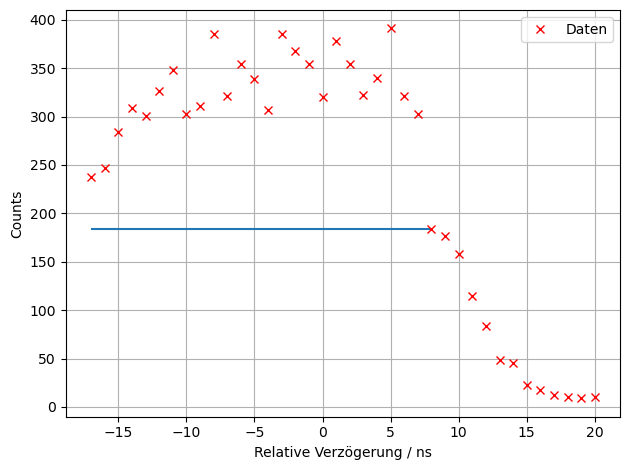

Halbwerstbreite: 25ns


In [30]:
# Tabelle 1:

md = pd.read_csv('tables/20ns_table.csv')
md = md.to_numpy()
x = md[:,0]
counts = md[:,1]
md_rearranged = np.c_[x[:np.int(np.round(len(x)/2))], counts[:np.int(np.round(len(x)/2))], x[np.int(np.round(len(x)/2)):], counts[np.int(np.round(len(x)/2)):]]
# md_rearranged = md.reshape((-1,4))

plt.hlines(md[25,1], md[0,0], md[25,0])
plt.plot(x, counts, 'r+', label="Daten", marker='x')
plt.ylabel('Counts')
plt.xlabel('Relative Verzögerung / ns')
plt.tight_layout()
plt.grid(':')
plt.legend(loc="best")
plt.show()
None
print('Halbwerstbreite: ' + str(md[25,0] - md[0,0]) + 'ns')

/tmp/ipykernel_470/3835555508.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  md_rearranged = np.c_[x[:np.int(np.round(len(x)/2))], counts[:np.int(np.round(len(x)/2))], x[np.int(np.round(len(x)/2)):], counts[np.int(np.round(len(x)/2)):]]
/tmp/ipykernel_470/3835555508.py:11: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r+" (-> marker='+'). The keyword argument will take precedence.
  plt.plot(x, counts, 'r+', label="Daten", marker='x')


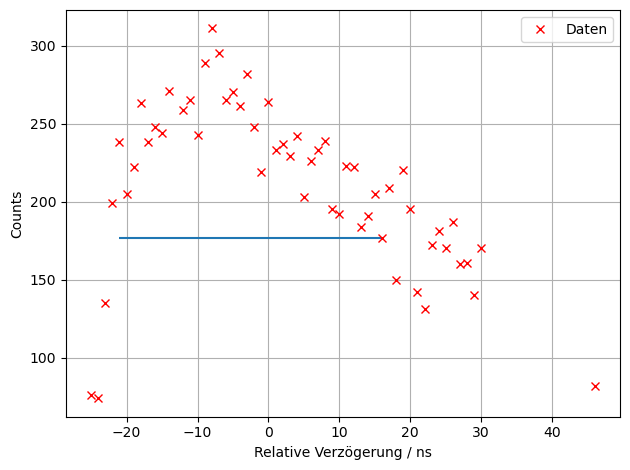

Halbwerstbreite: 37ns


In [31]:
# Tabelle 1:

md = pd.read_csv('tables/30ns_table.csv')
md = md.to_numpy()
x = md[:,0]
counts = md[:,1]
md_rearranged = np.c_[x[:np.int(np.round(len(x)/2))], counts[:np.int(np.round(len(x)/2))], x[np.int(np.round(len(x)/2)):], counts[np.int(np.round(len(x)/2)):]]
# md_rearranged = md.reshape((-1,4))

plt.hlines(md[40,1], md[4,0], md[40,0])
plt.plot(x, counts, 'r+', label="Daten", marker='x')
plt.ylabel('Counts')
plt.xlabel('Relative Verzögerung / ns')
plt.tight_layout()
plt.grid(':')
plt.legend(loc="best")
plt.show()
None
print('Halbwerstbreite: ' + str(md[40,0] - md[4,0]) + 'ns')

Parameter:  [0.02257131 0.14801307] 
Fehler:  [4.50070690e-05 5.99359768e-03]
0.02257+/-0.00005
0.148+/-0.006


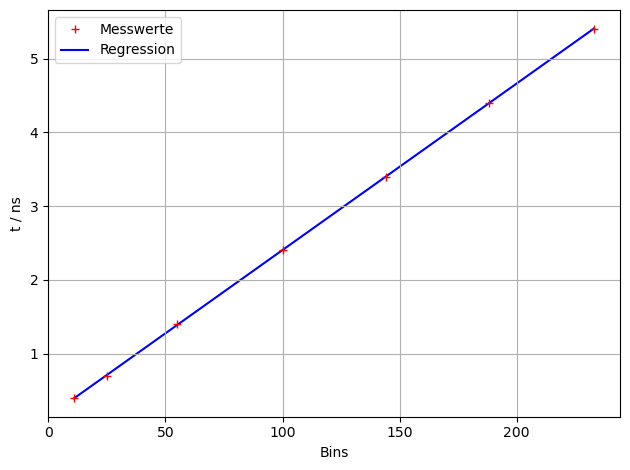

In [45]:
def func(x, m, b):
    return m * x + b

md = pd.read_csv('tables/monoflop.csv')
md = md.to_numpy()

y = md[:,0]
bins = md[:,1]

params, cov = curve_fit(func, bins, y)
print('Parameter: ', params, '\nFehler: ', np.sqrt(np.diag(cov)))

m = ufloat(params[0], np.sqrt(np.diag(cov))[0])
b = ufloat(params[1], np.sqrt(np.diag(cov))[1])

plt.plot(bins, y, 'r+', label="Messwerte",)
plt.plot(bins, func(bins, *params), 'b', label="Regression", zorder=0)
plt.ylabel('t / ns')
plt.xlabel('Bins')
plt.tight_layout()
plt.grid(':')
plt.legend(loc="best")
# plt.show()
print(m)
print(b)